<a href="https://colab.research.google.com/github/TetianaZabolotko/MLtrainings/blob/main/Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regresion

More generally, a linear model makes a prediction by simply computing a weighted
sum of the input features, plus a constant called the bias term (also called the intercept
term)

Linear Regression model prediction
$$ ŷ = θ_0 + θ_1x_1 + θ_2x_2 + ... + θ_nx_n$$

ŷ is the predicted value.

*   ŷ is the predicted value.
*   n is the number of features.
*   $x_i$ is the $i^{th}$ feature value.
*   $θ_j$ is the $j^{th}$ model parameter (including the bias term $θ_0$ and the feature weights $ (θ_1, θ_2, ⋯, θ_n)$.

Linear Regression model prediction (vectorized form)
$$y = h_θx = θ_T · x$$

$h_θ$ is the hypothesis function, using the model parameters $θ$.

Well, recall that
training a model means setting its parameters so that the model best fits the training
set. For this purpose, we first need a measure of how well (or poorly) the model fits
the training data. The most common performance measure
of a regression model is the Root Mean Square Error (RMSE). 
Therefore, to train a Linear Regression model, you need to find the value of $θ$ that minimizes the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE)
than the RMSE, and it leads to the same result (because the value that minimizes a
function also minimizes its square root).

**`MSE cost function`** for a Linear Regression model
$$\texttt{MSE}\,X,h_θ = \frac {1} {m}\sum^m_{i=1}(θ^T \cdot x^{(i)}-y^{(i)})^2$$

To find the value of $θ$ that minimizes the cost function, there is a closed-form solution
— in other words, a mathematical equation that gives the result directly. This is called
the Normal Equation
Normal Equation
$$ θ^{̂} = (X^T⋅X)^{-1}⋅X^{T}⋅y $$

*   $θ^{̂}$ is the value of $\theta$ that minimizes the cost function.
*   $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.


<function matplotlib.pyplot.show(*args, **kw)>

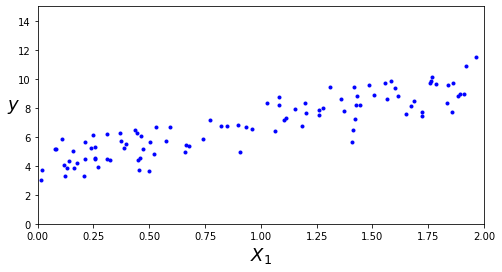

In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X = 2*np.random.rand(100,1)
#Create an array of the given shape and populate it with random samples 
#from a uniform distribution over [0, 1). 
y = 4 + 3*X + np.random.randn(100,1) # Gaussian noise
# Return a sample (or samples) from the “standard normal” distribution.
# For random samples from the normal distribution with mean mu and standard deviation 
#sigma, use: sigma * np.random.randn(...) + mu


plt.figure(figsize=(8,4))
plt.plot(X,y,'b.')
#plt.legend('top right')
plt.xlabel('$X_1$', fontsize =18)
plt.ylabel('$y$', rotation=0, fontsize =18)
plt.axis([0,2,0,15])
plt.show




In [2]:
X_b = np.c_[np.ones((100,1)), X]
y.shape
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.03999254],
       [2.91676906]])

Predictions using $ θ^̂ $ :

In [3]:
X_new  = np.array([[0], [2]])
X_new.shape

(2, 1)

In [4]:
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.03999254],
       [9.87353067]])

The actual function that we used to generate the data is $ y = 4 + 3x_0 + $ Gaussian noise.

$$y = \begin{pmatrix}
    1 & 0\\
    1 & 2 
\end{pmatrix}  · \begin{pmatrix}
    4.08\\
    2.94 
\end{pmatrix}$$

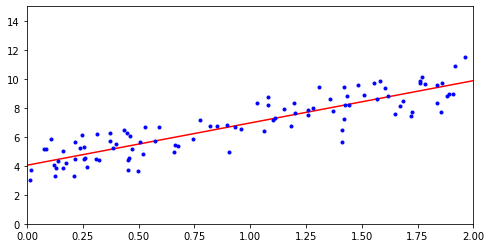

In [5]:
plt.figure(figsize=(8,4))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.03999254]), array([[2.91676906]]))

In [7]:
lin_reg.predict(X_new)

array([[4.03999254],
       [9.87353067]])

# Computational Complexity

The Normal Equation computes the inverse of $X^T · X$, which is an $n × n$ matrix
(where $n$ is the number of features). The computational complexity of inverting such a
matrix is typically about $O(n^{2.4})$ to $O(n^3)$ (depending on the implementation).

On the positive side, this equation is linear with regards to the number of instances in
the training set (it is O(m)), so it handles large training sets efficiently, provided they
can fit in memory.

# Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems. The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function.

# Batch Gradient Descent

# Stochastic Gradient Descent

# Mini-batch Gradient Descent

# Polynomial Regression

if your data is actually more complex than a simple straight line? Surprisingly,
you can actually use a linear model to fit nonlinear data.
**`Polynomial Regression`** is technique that add powers of each feature as new features, then train a linear model on this extended
set of features.

In [8]:
m=100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
y.shape

(100, 1)

<function matplotlib.pyplot.show(*args, **kw)>

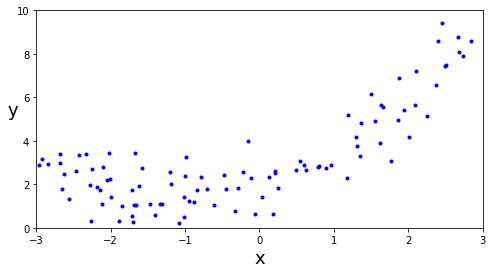

In [9]:
plt.figure(figsize=(8,4))
plt.plot(X,y,'b.')
plt.xlabel('x', fontsize =18)
plt.ylabel('y', rotation =False, fontsize =18)
plt.axis([-3,3,0,10])
plt.show


Generated nonlinear and noisy dataset

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s **`PolynomialFeatures class`** to transform our training data, adding the square (2nd-degree
polynomial) of each feature in the training set as new features (in this case there is
just one feature):

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.13317279])

In [11]:
X_poly[0]

array([0.13317279, 0.01773499])

X_poly now contains the original feature of X plus the square of this feature.

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.94262269]), array([[1.03259811, 0.48927699]]))

<function matplotlib.pyplot.show(*args, **kw)>

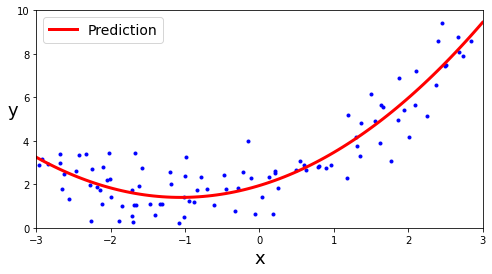

In [13]:

X_new =np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.figure(figsize=(8,4))
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r-', linewidth=3, label='Prediction')
plt.xlabel('x', fontsize =18)
plt.ylabel('y', rotation =False, fontsize =18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3,3,0,10])
plt.show

Note that when there are multiple features, Polynomial Regression is capable of find‐
ing relationships between features (which is something a plain Linear Regression
model cannot do). This is made possible by the fact that PolynomialFeatures also
adds all combinations of features up to the given degree. For example, if there were two features a and b, **`PolynomialFeatures`** with degree=3 would not only add the
features $a_2, a_3, b_2$, and $b_3$, but also the combinations $ab, a_2b$, and $ab_2$.

PolynomialFeatures(degree=d) transforms an array containing n features into an array containing $\frac{(n+d)!}{d!n!}$

# Learning Curves

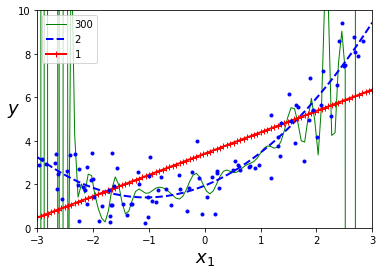

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (('g-',1, 300), ('b--', 2, 2), ('r-+', 2, 1)):
  polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = Pipeline([
      ('poly_features', polybig_features),
      ('std_scaler', std_scaler),
      ('lin_reg',lin_reg )    
  ])

  polynomial_regression.fit(X,y)
  y_new_big = polynomial_regression.predict(X_new)
  plt.plot(X_new,y_new_big,style,label=str(degree), linewidth=width)
  
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

you used cross-validation to get an estimate of a model’s generalization
performance. If a model performs well on the training data but generalizes poorly
according to the cross-validation metrics, then your model is **`overfitting`**. If it per‐
forms poorly on both, then it is **`underfitting`**. This is one way to tell when a model is
too simple or too complex.

Another way is to look at the **`learning curves`**: these are plots of the model’s perfor‐
mance on the training set and the validation set as a function of the training set size.
To generate the plots, simply train the model several times on different sized subsets
of the training set. The following code defines a function that plots the learning
curves of a model given some training data:

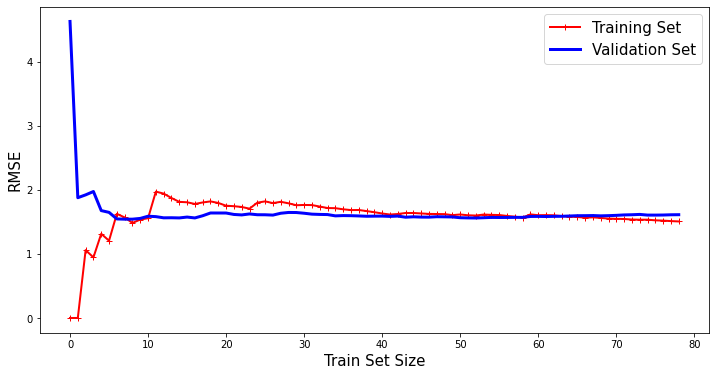

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X,y):
  X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Training Set')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validation Set')
  plt.xlabel('Train Set Size', fontsize =15)
  plt.ylabel('RMSE', fontsize =15)
  plt.legend(loc='upper right', fontsize=15)

plt.figure(figsize=(12,6))
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

These learning curves are typical of an underfitting model. Both curves have reached
a plateau; they are close and fairly high

If your model is underfitting the training data, adding more train‐
ing examples will not help. You need to use a more complex model
or come up with better features.

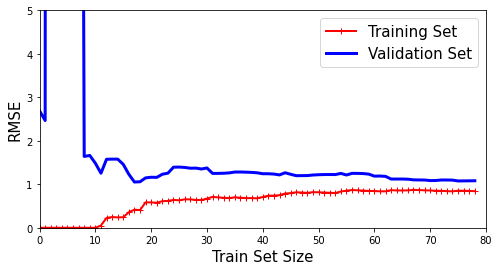

In [16]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ('sgd_reg', LinearRegression())
))
plt.figure(figsize=(8,4))
plt.axis([0,80,0,5])

plot_learning_curves(polynomial_regression, X, y)

These learning curves look a bit like the previous ones, but there are two very impor‐
tant differences:
* The error on the training data is much lower than with the Linear Regression
model.
* There is a gap between the curves. This means that the model performs signifi‐
cantly better on the training data than on the validation data, which is the hall‐
mark of an **`overfitting`** model. However, if you used a much larger training set,
the two curves would continue to get closer.

One way to improve an overfitting model is to feed it more training
data until the validation error reaches the training error.

**The Bias/Variance Tradeoff**
An important theoretical result of statistics and Machine Learning is the fact that a
model’s generalization error can be expressed as the sum of three very different
errors:
* **Bias**

This part of the generalization error is due to wrong assumptions, such as assum‐
ing that the data is linear when it is actually quadratic. A high-bias model is most
likely to underfit the training data.10
* **Variance**

This part is due to the model’s excessive sensitivity to small variations in the
training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training
data.

* **Irreducible error**

This part is due to the noisiness of the data itself. The only way to reduce this
part of the error is to clean up the data (e.g., fix the data sources, such as broken
sensors, or detect and remove outliers).
Increasing a model’s complexity will typically increase its variance and reduce its bias.

Conversely, reducing a model’s complexity increases its bias and reduces its variance.
This is why it is called a tradeoff.

# Regularized Linear Models

A good way to reduce overfitting is to **`regularize`** the
model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data.
For a linear model, regularization is typically achieved by constraining the weights of
the model.

# Ridge Regression

**`Ridge Regression`** (also called `Tikhonov regularization`) is a regularized version of Linear Regression: a regularization term equal to **$α∑^n_{i=1} θ^2_i$** is added to the cost function.
This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.

Note that the regularization term should only be added
to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure.

The hyperparameter $α$ controls how much you want to regularize the model. If $α = 0$
then Ridge Regression is just Linear Regression. If $α$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

$$J θ = \texttt{MSE} (θ) + α\frac12\sum_{i=1}^n \theta_i^2$$

Ridge Regression cost function

Note that the bias term $θ_0$ is not regularized (the sum starts at $i = 1$, not $0$). If we define  $w$ as the vector of feature weights ($θ_1$ to $θ_n$), then the regularization term is
simply equal to $½(∥ w ∥_2)^2$, where $∥ · ∥^2$ represents the $ℓ_2$ norm of the weight vector.

For Gradient Descent, just add $αw$ to the MSE gradient vector

It is important to scale the data (e.g., using a StandardScaler)
before performing Ridge Regression, as it is sensitive to the scale of
the input features. This is true of most regularized models.

$$ θ^{̂} = (X^T\cdot X + αA)^{-1}\cdot X^{T}\cdot y$$

Ridge Regression closed-form solution

Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution (a variant using a matrix factorization technique by André-Louis
Cholesky):

In [17]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.87955057]])

And using Stochastic Gradient Descent

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.84300911])

The penalty hyperparameter sets the type of regularization term to use.

# Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the $ℓ_1$ norm
of the weight vector instead of half the square of the $ℓ_2$ norm

$$J θ = \texttt{MSE} (θ) + α\frac12\sum_{i=1}^n |\theta_i|$$

Lasso Regression cost function

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features

The Lasso cost function is not differentiable at $θ_i = 0$ (for $i = 1, 2, ⋯, n)$, but Gradient
Descent still works fine if you use a subgradient vector $g$.


$$ g(θ,J) = \nabla_{\theta}\texttt{MSE}(\theta)+\alpha\begin{pmatrix} \texttt{sign}(\theta_1) \\ \vdots \\ \texttt{sign}(\theta_n) \end{pmatrix}, \;\,\,\,\, \texttt{sign}(\theta_i) = \begin{cases} -1, & \mbox{if } \theta_i<0 \\ 0, & \mbox{if }\theta_i=0,  \\ +1, & \mbox{if } \theta_i>0 & \end{cases} $$

In [19]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.82645401])

# Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When $r = 0$, Elastic Net is equivalent to Ridge
Regression, and when $r = 1$, it is equivalent to Lasso Regression

Elastic Net cost function
$$J θ = \texttt{MSE} (θ) + rα\frac12\sum_{i=1}^n |\theta_i| + \frac{1-r}{2}α\frac12\sum_{i=1}^n \theta_i^2$$

So when should you use Linear Regression, Ridge, Lasso, or Elastic Net? It is almost
always preferable to have at least a little bit of regularization, so generally you *`should
avoid plain Linear Regression`*. Ridge is a good default, but *`if you suspect that only a
few features are actually useful, you should prefer Lasso or Elastic Net since they tend
to reduce the useless features’ weights down to zero`* as we have discussed . In general,
Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

# Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum. This is
called **`early stopping`**.

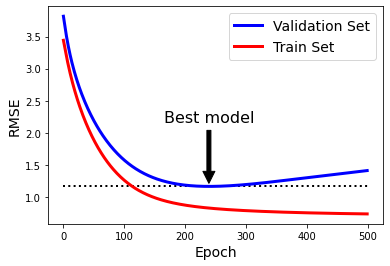

In [28]:
from sklearn.metrics import mean_squared_error
np.random.seed(42)
m=100
X = 6*np.random.rand(m,1)-3
y = 2 + X +0.5*X**2+ np.random.randn(m,1)
X_train, X_val, y_train, y_val = train_test_split(X[:50],y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
   ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate='constant',
                       random_state=42
                       )
n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):
  sgd_reg.fit(X_train_poly_scaled,y_train)
  y_train_predict = sgd_reg.predict(X_train_poly_scaled)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  train_errors.append(mean_squared_error(y_train, y_train_predict))
  val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )
plt.plot([0,n_epochs],[best_val_rmse, best_val_rmse],'k:', linewidth=2)
plt.plot(np.sqrt(val_errors),'b-', linewidth=3, label='Validation Set')
plt.plot(np.sqrt(train_errors),'r-', linewidth=3, label='Train Set')

plt.legend(loc='upper right', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.show()

With Stochastic and Mini-batch Gradient Descent, the curves are
not so smooth, and it may be hard to know whether you have
reached the minimum or not. One solution is to stop only after the
validation error has been above the minimum for some time (when
you are confident that the model will not do any better), then roll
back the model parameters to the point where the validation error
was at a minimum

In [32]:
from sklearn.base import clone

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val_predict, y_val)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg) 

In [33]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

# Logistic Regression

# Training and Cost Function

# Decision Boundaries

# Softmax Regression